In [12]:
from dotenv import load_dotenv

load_dotenv()

True

In [13]:
from datetime import datetime
from langchain_core.tools import tool


@tool
def get_current_time():
    """Use this to get current date or time"""
    return datetime.now()

In [14]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [24]:

from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langgraph.prebuilt import create_react_agent

tools = [get_current_time]
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
llm = llm.bind_tools(tools)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer in Korean.",
        ),
        ("human", "{messages}"),
    ]
)


graph = create_react_agent(llm, tools, state_modifier=prompt)

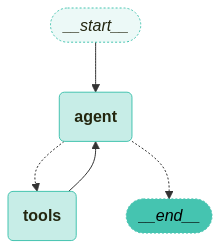

In [25]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph, xray=True)

In [29]:
from langchain_core.messages import HumanMessage

question = "한국에 대해 100글자로 요약해줘"
inputs = {"messages": [("user", question)], }
for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages"):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

한국은 동아시아에 위치한 나라로, 한반도의 남쪽에 있습니다. 서울이 수도이며, 고유의 문화와 역사를 가지고 있습니다. K-팝, 한식, 전통 예술 등으로 세계적으로 알려져 있습니다. 경제는 기술과 제조업 중심으로 발전하였고, 교육 수준이 높습니다. 자연 경관도 아름다워 관광지로 인기가 많습니다.

In [30]:
from langchain_core.messages import HumanMessage

question = "지금 몇일이야?"
inputs = {"messages": [("user", question)]}
for chunk_msg, metadata  in graph.stream(inputs, stream_mode="messages"):
    if (
            chunk_msg.content
            and not isinstance(chunk_msg, HumanMessage)
            and metadata["langgraph_node"] == "agent"
    ):
        print(chunk_msg.content, end="", flush=True)

오늘은 2025년 4월 13일입니다.